In [189]:
import numpy as np
import pandas as pd

In [190]:
from os import listdir

filepaths = [f for f in listdir("./") if f.endswith('.csv')]
us_census = pd.concat(map(pd.read_csv, filepaths), ignore_index = True)

In [201]:
filepaths

['inventory.csv',
 'states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [204]:
us_census.head(80)

,location,product_type,product_description,quantity,price,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male
0,Staten Island,seeds,daisy,4.0,6.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Staten Island,seeds,calla lily,46.0,19.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Staten Island,seeds,tomato,85.0,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Staten Island,garden tools,rake,4.0,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,garden tools,wheelbarrow,0.0,89.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,Puerto Rico,3583073.0,98.89,0.77,0.09,0.00,0.08,0.00,20720.54,1713860
76,NaN,NaN,NaN,NaN,NaN,Rhode Island,1053661.0,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388
77,NaN,NaN,NaN,NaN,NaN,Rhode Island,1053661.0,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388
78,NaN,NaN,NaN,NaN,NaN,South Carolina,4777576.0,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409


In [205]:
us_census.drop(columns = ['Unnamed: 0'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [206]:
us_census[['Male','Female']] = us_census.GenderPop.str.split("_",expand=True) 

AttributeError: 'DataFrame' object has no attribute 'GenderPop'

In [207]:
us_census.drop(columns = ['GenderPop'], inplace=True)

KeyError: "['GenderPop'] not found in axis"

In [208]:
us_census['Income'] = us_census.Income.str.strip('$')

AttributeError: Can only use .str accessor with string values!

In [209]:
us_census = us_census.replace('%','', regex=True)

In [210]:
us_census = us_census.replace('F','', regex=True)

In [211]:
us_census = us_census.replace('M','', regex=True)

In [212]:
us_census.loc[:,'Hispanic':'Income'] = round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),2)

In [213]:
us_census['Male'] = us_census['Male'].astype(int)

ValueError: cannot convert float NaN to integer

In [214]:
us_census.drop(columns = ['Female'], inplace=True)

KeyError: "['Female'] not found in axis"

In [215]:
us_census['Female'] = us_census['TotalPop'] - us_census['Male']

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [216]:
us_census.dtypes

location                object
product_type            object
product_description     object
quantity               float64
price                  float64
State                   object
TotalPop               float64
Hispanic               float64
White                  float64
Black                  float64
Native                 float64
Asian                  float64
Pacific                float64
Income                 float64
Male                    object
dtype: object

In [217]:
import matplotlib.pyplot as plt
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=16)
plt.show()

KeyError: 'Female'

In [218]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 89, dtype: bool

In [219]:
us_census.drop_duplicates(inplace= True)

In [220]:
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=16)
plt.show()

KeyError: 'Female'

In [221]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 80, dtype: bool

### ploting histograms for races 

In [222]:
us_census

,location,product_type,product_description,quantity,price,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male
0,Staten Island,seeds,daisy,4.0,6.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Staten Island,seeds,calla lily,46.0,19.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Staten Island,seeds,tomato,85.0,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Staten Island,garden tools,rake,4.0,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island,garden tools,wheelbarrow,0.0,89.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,NaN,NaN,NaN,NaN,NaN,Vermont,626604.0,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573
85,NaN,NaN,NaN,NaN,NaN,Virginia,8256630.0,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948
86,NaN,NaN,NaN,NaN,NaN,Washington,6985464.0,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725
87,NaN,NaN,NaN,NaN,NaN,West Virginia,1851420.0,1.29,92.18,3.66,0.15,0.68,0.03,41437.11,913631


In [223]:
us_census.describe()

,quantity,price,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income
count,29.000000,29.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,47.000000,51.000000
mean,40.758621,23.024483,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.307021,55922.667255
std,35.183859,23.810986,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.278634,11479.923759
min,0.000000,3.990000,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000
25%,5.000000,12.990000,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.025000,48358.540000
50%,36.000000,17.990000,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.040000,54207.820000
75%,76.000000,19.990000,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.085000,63889.835000
max,98.000000,89.990000,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000


In [224]:
histo =  round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

In [225]:
histo.head()

,Hispanic,White,Black,Native,Asian,Pacific
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
histo.fillna(method='bfill', inplace = True)

In [227]:
histo.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,181148,2989188,1509569,21738,50722,1449
2,181148,2989188,1509569,21738,50722,1449
3,181148,2989188,1509569,21738,50722,1449
4,181148,2989188,1509569,21738,50722,1449
...,...,...,...,...,...,...
84,10088,588882,6141,1880,7770,188
85,661356,5223970,1666188,17339,450812,4954
86,778181,5032328,236109,98495,490380,42611
87,23883,1706639,67762,2777,12590,555


In [228]:
histo['total_pop'] =us_census['TotalPop']
histo['state'] = us_census['State']

array([[<AxesSubplot:title={'center':'Hispanic'}>]], dtype=object)

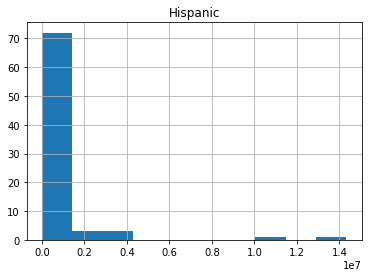

In [229]:
histo.hist(column='Hispanic')

array([[<AxesSubplot:title={'center':'White'}>]], dtype=object)

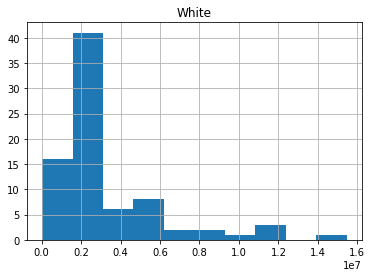

In [230]:
histo.hist(column='White')

array([[<AxesSubplot:title={'center':'Black'}>]], dtype=object)

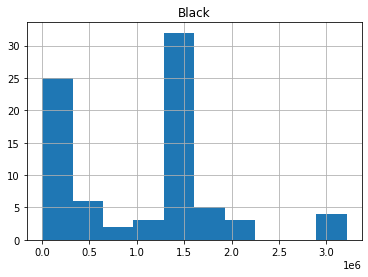

In [231]:
histo.hist(column='Black')

array([[<AxesSubplot:title={'center':'Native'}>]], dtype=object)

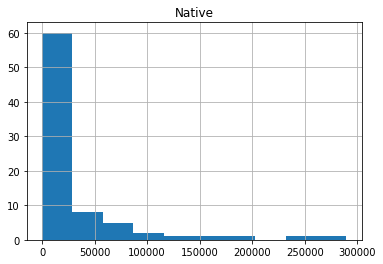

In [232]:
histo.hist(column='Native')

array([[<AxesSubplot:title={'center':'Asian'}>]], dtype=object)

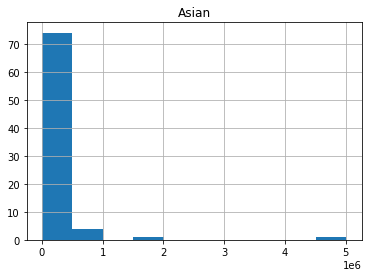

In [233]:
histo.hist(column='Asian')

array([[<AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

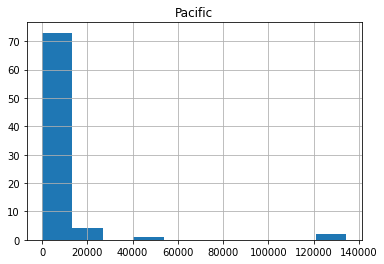

In [234]:
histo.hist(column='Pacific')